# Roller Coaster

#### Project Goals

You will work to create several data visualizations that will give you insight into the world of roller coasters.

## Project Requirements

1. Roller coasters are thrilling amusement park rides designed to make you squeal and scream! They take you up high, drop you to the ground quickly, and sometimes even spin you upside down before returning to a stop. Today you will be taking control back from the roller coasters and visualizing data covering international roller coaster rankings and roller coaster statistics.

   Roller coasters are often split into two main categories based on their construction material: **wood** or **steel**. Rankings for the best wood and steel roller coasters from the 2013 to 2018 [Golden Ticket Awards](http://goldenticketawards.com) are provded in `'Golden_Ticket_Award_Winners_Wood.csv'` and `'Golden_Ticket_Award_Winners_Steel.csv'`, respectively. 

In [2]:
# 1 
# Import necessary libraries

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# load rankings data

df_wood = pd.read_csv('E:\\Semo4ka\\Python\\CodeCademy\\roller_coaster\\Golden_Ticket_Award_Winners_Wood.csv')

df_steel = pd.read_csv('E:\\Semo4ka\\Python\\CodeCademy\\roller_coaster\\Golden_Ticket_Award_Winners_Steel.csv')
# load rankings data

print(df_wood.head())
print(df_steel.head())

   Rank          Name                       Park             Location  \
0     1  Boulder Dash             Lake Compounce       Bristol, Conn.   
1     2       El Toro  Six Flags Great Adventure        Jackson, N.J.   
2     3       Phoenix  Knoebels Amusement Resort        Elysburg, Pa.   
3     4    The Voyage              Holiday World    Santa Claus, Ind.   
4     5   Thunderhead                  Dollywood  Pigeon Forge, Tenn.   

           Supplier  Year Built  Points  Year of Rank  
0               CCI        2000    1333          2013  
1           Intamin        2006    1302          2013  
2  Dinn/PTC-Schmeck        1985    1088          2013  
3     Gravity Group        2006    1086          2013  
4              GCII        2004     923          2013  
   Rank                Name                        Park           Location  \
0     1    Millennium Force                 Cedar Point     Sandusky, Ohio   
1     2             Bizarro       Six Flags New England      Agawam, 

2. Write a function that will plot the ranking of a given roller coaster over time as a line. Your function should take a roller coaster's name and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with `"El Toro"` as the roller coaster name and the wood ranking DataFrame. What issue do you notice? Update your function with an additional argument to alleviate the problem, and retest your function.

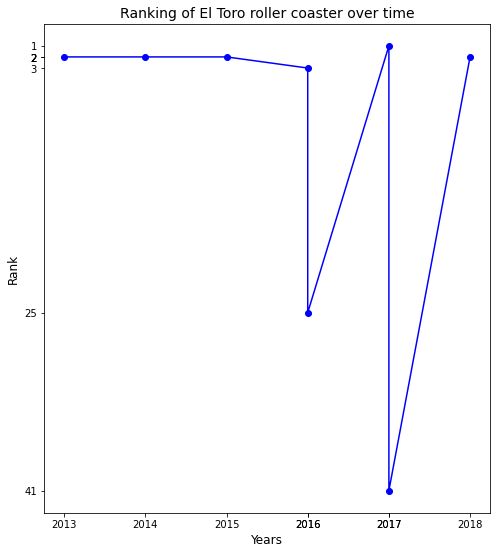

<Figure size 432x288 with 0 Axes>

In [5]:
# 2
# Create a function to plot rankings over time for 1 roller coaster
def rc_ranking(name, df):
    ranking = list(df.Rank[df.Name == name])
    timeframe = list(df['Year of Rank'][df.Name == name])   
    plt.figure(figsize = (8,9))
    ax = plt.subplot()
    plt.plot(timeframe, ranking, marker = 'o', color = 'blue')
    ax.set_xticks(timeframe)
    ax.set_yticks(ranking)
    ax.invert_yaxis()
    plt.title('Ranking of {} roller coaster over time'.format(name), fontsize = 14)
    plt.xlabel('Years', fontsize = 12)
    plt.ylabel('Rank', fontsize = 12)
    plt.show()
    plt.close()
    
rc_ranking("El Toro", df_wood)
plt.clf()

3. Write a function that will plot the ranking of two given roller coasters over time as lines. Your function should take both roller coasters' names and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with `"El Toro"` as one roller coaster name, `"Boulder Dash"` as the other roller coaster name, and the wood ranking DataFrame. What issue do you notice? Update your function with two additional arguments to alleviate the problem, and retest your function.

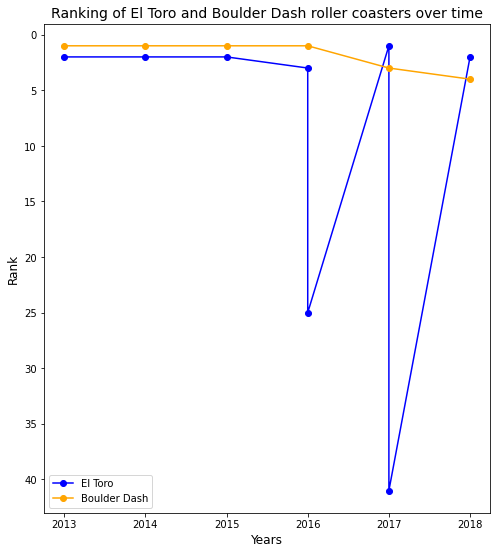

<Figure size 432x288 with 0 Axes>

In [3]:
# 3
# Create a function to plot rankings over time for 2 roller coasters
def rc_of2_ranking(name1, name2, df):
    ranking1 = list(df.Rank[df.Name == name1])
    ranking2 = list(df.Rank[df.Name == name2])
    timeframe1 = list(df['Year of Rank'][df.Name == name1])
    timeframe2 = list(df['Year of Rank'][df.Name == name2])   
    plt.figure(figsize = (8,9))
    ax = plt.subplot()
    plt.plot(timeframe1, ranking1, marker = 'o', color = 'blue')
    plt.plot(timeframe2, ranking2, marker = 'o', color = 'orange')
    ax.invert_yaxis()
    plt.title('Ranking of {} and {} roller coasters over time'.format(name1, name2), fontsize = 14)
    plt.xlabel('Years', fontsize = 12)
    plt.ylabel('Rank', fontsize = 12)
    plt.legend([name1, name2])
    plt.show()
    plt.close()
    
rc_of2_ranking("El Toro", "Boulder Dash", df_wood)
plt.clf()


4. Write a function that will plot the ranking of the top `n` ranked roller coasters over time as lines. Your function should take a number `n` and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

   For example, if `n == 5`, your function should plot a line for each roller coaster that has a rank of `5` or lower.
   
   Call your function with a value of `n` and either the wood ranking or steel ranking DataFrame.

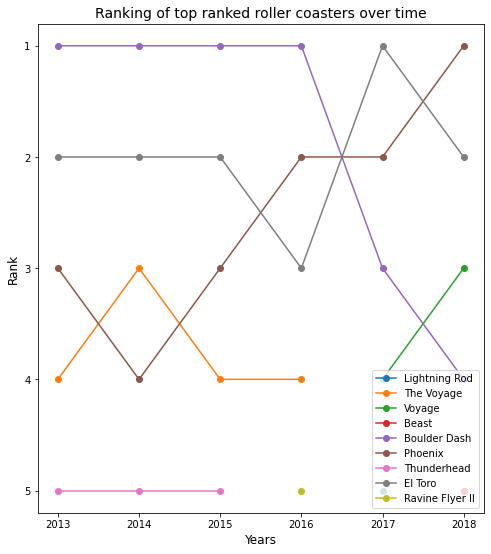

<Figure size 432x288 with 0 Axes>

In [4]:
# 4
# Create a function to plot top n rankings over time
def rc_top_ranking(number, df):
    df_top = df[df.Rank <= number]
    plt.figure(figsize = (8,9))
    for name in set(df_top.Name):
        top_rank = df_top[df_top.Name == name]
        plt.plot(top_rank['Year of Rank'], top_rank.Rank, marker = 'o', label=name)
    ax = plt.subplot()
    ax.set_yticks([i for i in range(1,6)])
    ax.invert_yaxis()
    plt.title('Ranking of top ranked roller coasters over time', fontsize = 14)
    plt.xlabel('Years', fontsize = 12)
    plt.ylabel('Rank', fontsize = 12)
    plt.legend(loc=4)
    plt.show()
    plt.close()
    
rc_top_ranking(5, df_wood)
plt.clf()
# Create a plot of top n rankings over time


5. Now that you've visualized rankings over time, let's dive into the actual statistics of roller coasters themselves. [Captain Coaster](https://captaincoaster.com/en/) is a popular site for recording roller coaster information. Data on all roller coasters documented on Captain Coaster has been accessed through its API and stored in `roller_coasters.csv`. 

In [5]:
# 5
# load roller coaster data
df_rc = pd.read_csv('E:\\Semo4ka\\Python\\CodeCademy\\roller_coaster\\roller_coasters.csv')
print(df_rc.head(10))

                     name material_type seating_type  speed  height  length  \
0                Goudurix         Steel     Sit Down   75.0    37.0   950.0   
1           Dream catcher         Steel    Suspended   45.0    25.0   600.0   
2              Alucinakis         Steel     Sit Down   30.0     8.0   250.0   
3                Anaconda        Wooden     Sit Down   85.0    35.0  1200.0   
4                  Azteka         Steel     Sit Down   55.0    17.0   500.0   
5             Bat Coaster         Steel     Inverted   70.0    20.0   400.0   
6  Batman : Arkham Asylum         Steel     Inverted   80.0    32.0   823.0   
7    Big Thunder Mountain         Steel     Sit Down   60.0    22.0  1500.0   
8               EqWalizer         Steel     Sit Down   76.0    36.0   285.0   
9           Calamity Mine         Steel     Sit Down   48.0    14.0   785.0   

   num_inversions     manufacturer                  park            status  
0             7.0           Vekoma          Parc Aste

6. Write a function that plots a histogram of any numeric column of the roller coaster DataFrame. Your function should take a DataFrame and a column name for which a histogram should be constructed as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame and one of the column names.

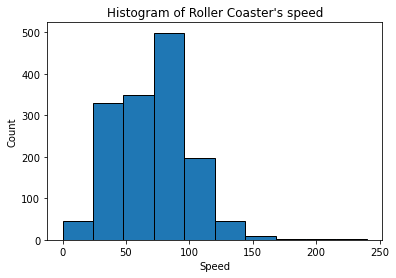

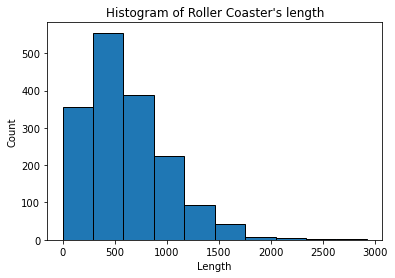

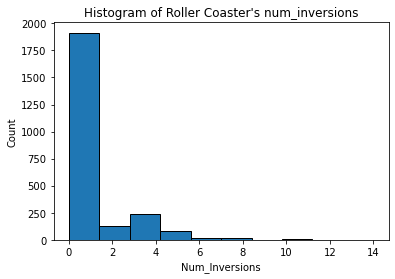

[ 37.  25.   8.  35.  17.  20.  32.  22.  36.  14.  nan  24.  15.   3.
  28.  26.  53.  12.  18.  34.  16.  38.   6.  23.  73.  50.  31.  58.
  13.  33.  42.  30.  19.  11.   9.  45.   5.   4.  40.  65.  21.  48.
  51.  46.  29. 139.  52. 128.  61.  43.  70.  94.  39.  57. 126.  47.
  71.  62.  66.  56.  27.   7.  64.  68.  60.  44.  75.  63.  80. 115.
  49.  55.  10.  54.  67.  41.  79.  76.  97. 902.   2.  93. 112.  77.
  99.  74. 200.   0.]


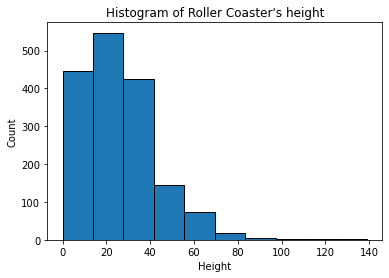

In [6]:
# 6
# Create a function to plot histogram of column values

def histogram(df, column_name):
    plt.hist(df[column_name].dropna(), edgecolor = 'black')
    plt.title("Histogram of Roller Coaster's {}".format(column_name))
    plt.xlabel('{}'.format(column_name.title()))
    plt.ylabel('Count')
    plt.show()
    plt.close()
    
    
    
# Create histogram of roller coaster speed
histogram(df_rc, 'speed')
# Create histogram of roller coaster length
histogram(df_rc, 'length')
# Create histogram of roller coaster number of inversions
histogram(df_rc, 'num_inversions')
# Create a function to plot histogram of height values
print(df_rc.height.unique())
def histogram_of_height_values(df):
    plt.hist(df.height[df.height <= 150].dropna(), edgecolor = 'black')
    plt.title("Histogram of Roller Coaster's height")
    plt.xlabel('Height')
    plt.ylabel('Count')
    plt.show()
    plt.close()
# Create a histogram of roller coaster height
histogram_of_height_values(df_rc)

7. Write a function that creates a bar chart showing the number of inversions for each roller coaster at an amusement park. Your function should take the roller coaster DataFrame and an amusement park name as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame and amusement park name.

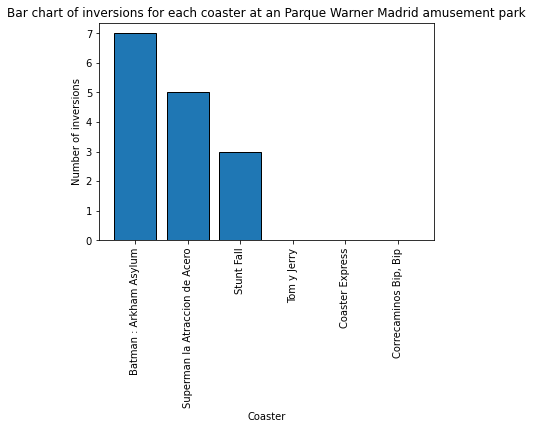

In [7]:
# 7
# Create a function to plot inversions by coaster at park
def inversions_for_rc(df, park_name):
    coasters = df.name[df.park == park_name]
    inversions = df.num_inversions[df.park == park_name].sort_values(ascending = False)
    ax = plt.subplot() 
    plt.bar(range(len(inversions)), inversions, edgecolor = 'black')
    plt.title("Bar chart of inversions for each coaster at an {} amusement park".format(park_name))
    ax.set_xticks(range(len(coasters)))
    ax.set_xticklabels(coasters, rotation = 90)
    plt.xlabel('Coaster')
    plt.ylabel('Number of inversions')
    plt.show()
    plt.close()
# Create barplot of inversions by roller coasters
inversions_for_rc(df_rc, 'Parque Warner Madrid')

8. Write a function that creates a pie chart that compares the number of operating roller coasters (`'status.operating'`) to the number of closed roller coasters (`'status.closed.definitely'`). Your function should take the roller coaster DataFrame as an argument. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame.

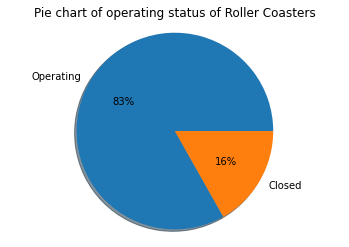

In [8]:
# 8
# Create a function to plot a pie chart of status.operating

def pie_operating_rc(df):
    operating = df.status[df.status == 'status.operating']
    closed = df.status[df.status == 'status.closed.definitely']
    count_operating = len(operating)
    count_closed = len(closed)
    plt.pie([count_operating, count_closed], labels = ['Operating', 'Closed'], autopct = '%d%%', shadow = True)
    plt.axis('equal')
    plt.title("Pie chart of operating status of Roller Coasters")
    plt.show()
    plt.close()
    
# Create pie chart of roller coasters

pie_operating_rc(df_rc)

9. Write a function that creates a scatter plot of two numeric columns of the roller coaster DataFrame. Your function should take the roller coaster DataFrame and two-column names as arguments. Make sure to include informative labels that describe your visualization.
   
   Call your function with the roller coaster DataFrame and two-column names.

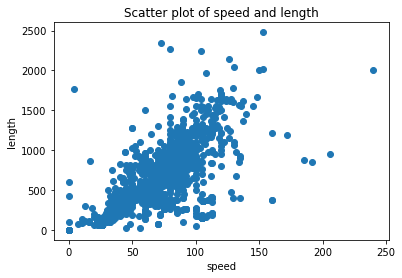

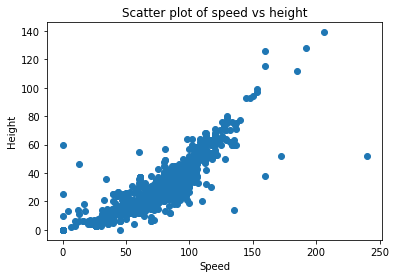

In [9]:
# 9
# Create a function to plot scatter of any two columns

def scatter(df, name1, name2):
    plt.scatter(df[name1], df[name2])
    plt.title("Scatter plot of {} and {}".format(name1, name2))
    plt.xlabel(name1)
    plt.ylabel(name2)
    plt.show()
    plt.close()
    
scatter(df_rc, 'speed', 'length')   
# Create a function to plot scatter of speed vs height
def scatter_speed_height(df):
    plt.scatter(df.speed[df.height <= 200], df.height[df.height <= 200])
    plt.title("Scatter plot of speed vs height")
    plt.xlabel('Speed')
    plt.ylabel('Height')
    plt.show()
    plt.close()


# Create a scatter plot of roller coaster height by speed
scatter_speed_height(df_rc)  


10. Part of the fun of data analysis and visualization is digging into the data you have and answering questions that come to your mind.

    Some questions you might want to answer with the datasets provided include:
    - What roller coaster seating type is most popular? And do different seating types result in higher/faster/longer roller coasters?
    - Do roller coaster manufactures have any specialties (do they focus on speed, height, seating type, or inversions)?
    - Do amusement parks have any specialties?
    

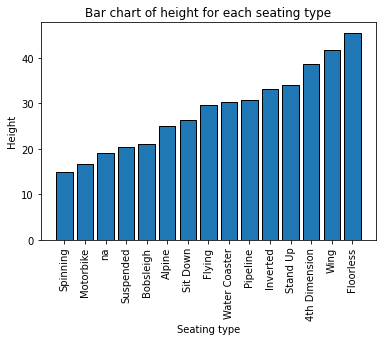

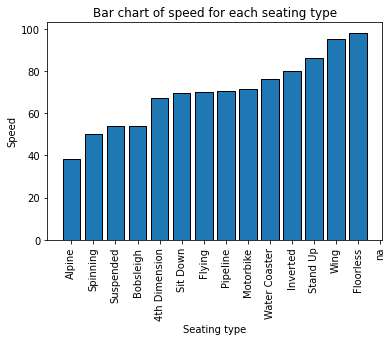

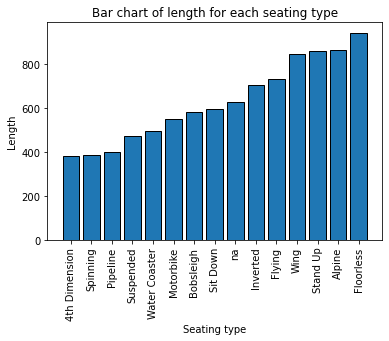

In [10]:
#What roller coaster seating type is most popular? 
#And do different seating types result in higher/faster/longer roller coasters?

seating = df_rc.seating_type.value_counts()
#print(seating)

def average_val(df, column):
    average_dict = {}
    for seat in df.seating_type.unique():
        mean = df_rc[column][df_rc.seating_type == seat].mean()
        #print('mean height of roller coaster for {} seating: '.format(seat), mean_height)
        average_dict[seat] = mean

    average_dict = {k: v for k, v in sorted(average_dict.items(), key=lambda item: item[1])}
    return average_dict

def bar_chart(data, column):
    ax = plt.subplot() 
    plt.bar(range(len(data)), data.values(), edgecolor = 'black')
    plt.title("Bar chart of {} for each seating type".format(column))
    ax.set_xticks(range(len(data)))
    ax.set_xticklabels(data.keys(), rotation = 90)
    plt.xlabel('Seating type')
    plt.ylabel('{}'.format(column.title()))
    plt.show()
    plt.close()
    
bar_chart(average_val(df_rc, 'height'), 'height')

bar_chart(average_val(df_rc, 'speed'), 'speed')

bar_chart(average_val(df_rc, 'length'), 'length')


Average height is: 26.73


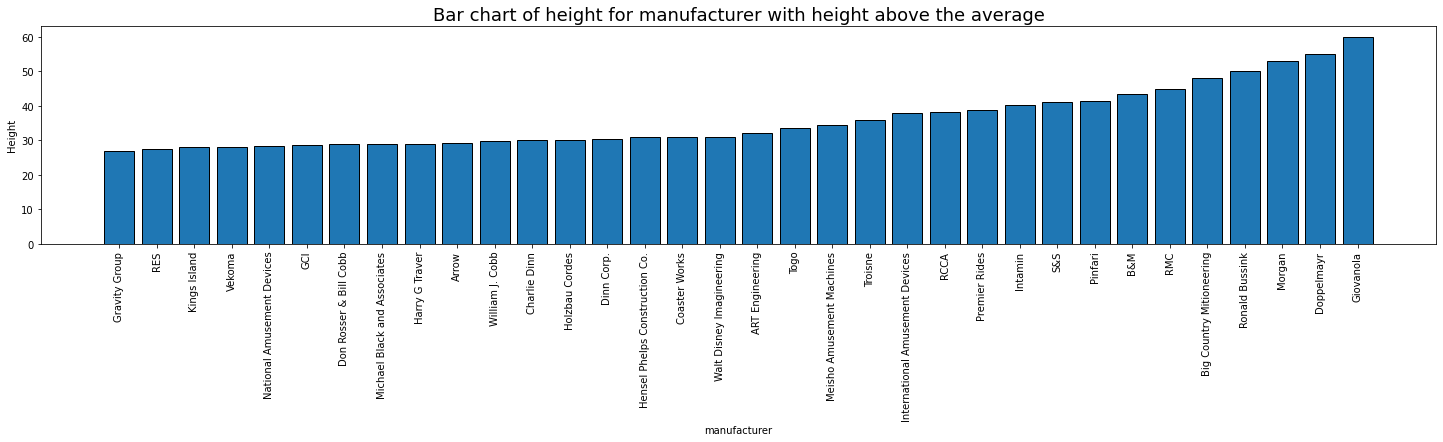

Average speed is: 70.10


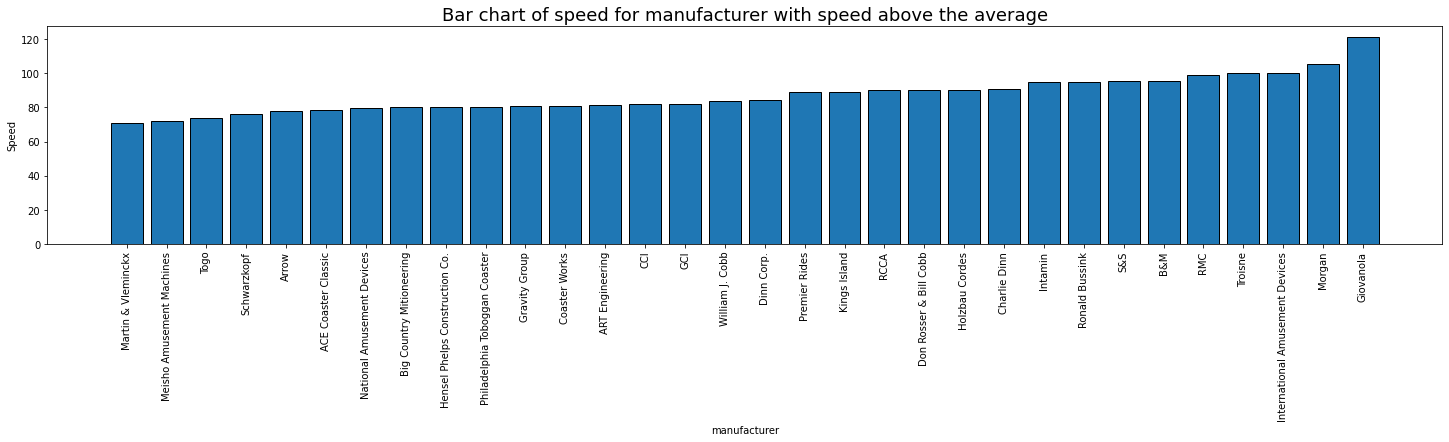

Average length is: 606.15


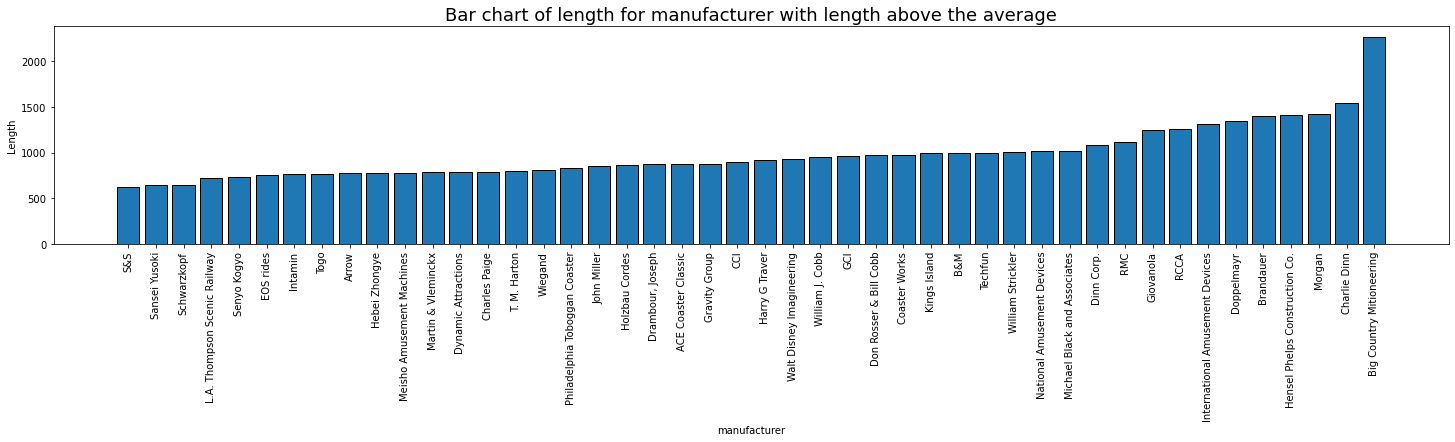

Average num_inversions is: 0.81


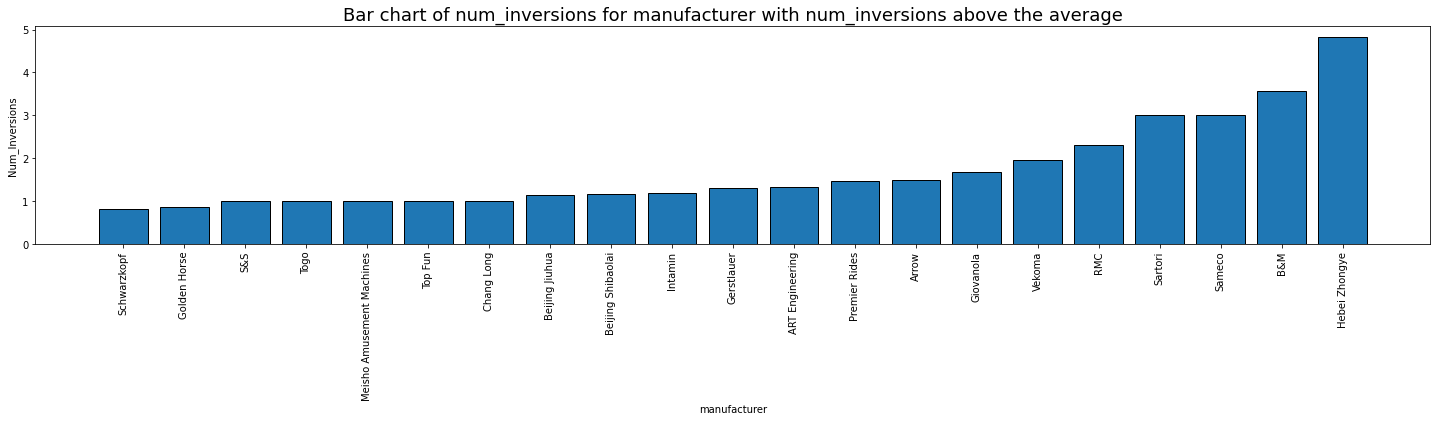

In [11]:
#Do roller coaster manufactures have any specialties (do they focus on speed, height, or inversions)?
def average_val_by(df, column_base, column_analyze):
    average_dict = {}
    over_average_dict = {}
    for man in df[column_base].unique():
        mean = df_rc[column_analyze][df_rc[column_base] == man].mean()
        #print('mean height of roller coaster for {} seating: '.format(seat), mean_height)
        average_dict[man] = mean

    mean = np.mean(df[column_analyze])
    print('Average {} is: {:0.2f}'.format(column_analyze, mean))
    for k, v in average_dict.items():
        if v >= mean:
            over_average_dict[k] = v
            
    over_average_dict = {k: v for k, v in sorted(over_average_dict.items(), key=lambda item: item[1])}
    return over_average_dict

def bar_chart_by(data, column_mean, column_analyze):
    plt.figure(figsize = (25,4))  
    ax = plt.subplot() 
    plt.bar(range(len(data)), data.values(), edgecolor = 'black')
    plt.title("Bar chart of {} for {} with {} above the average".format(column_analyze, column_mean, column_analyze), fontsize = 18)
    ax.set_xticks(range(len(data)))
    ax.set_xticklabels(data.keys(), rotation = 90)
    plt.xlabel('{}'.format(column_mean))
    plt.ylabel('{}'.format(column_analyze.title()))
    plt.show()
    plt.close()
    
bar_chart_by(average_val_by(df_rc, 'manufacturer', 'height'), 'manufacturer', 'height')

bar_chart_by(average_val_by(df_rc, 'manufacturer', 'speed'), 'manufacturer', 'speed')

bar_chart_by(average_val_by(df_rc, 'manufacturer', 'length'), 'manufacturer', 'length')

bar_chart_by(average_val_by(df_rc, 'manufacturer', 'num_inversions'), 'manufacturer', 'num_inversions')

